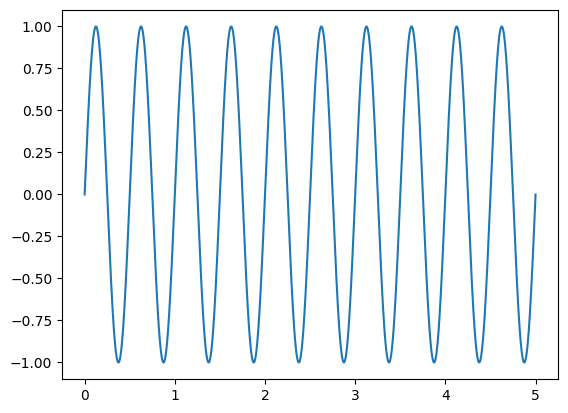

In [1]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

In [2]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

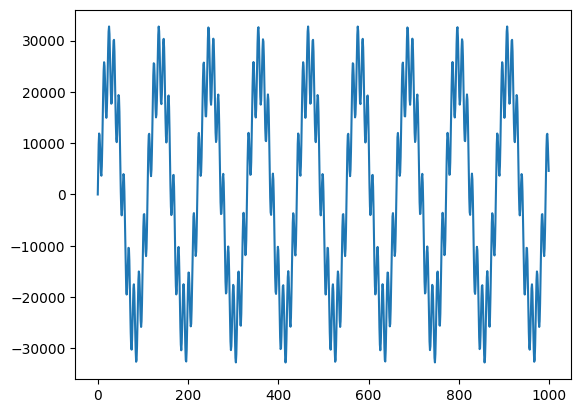

In [3]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

In [4]:
from scipy.io.wavfile import write

# Remember SAMPLE_RATE = 44100 Hz is our playback rate
write("mysinewave.wav", SAMPLE_RATE, normalized_tone)

In [63]:
type(normalized_tone)

list

In [58]:
normalized_tone = [1.76416015625,

3.996826171875,

-3.313446044921875,

0.7293701171875,

8.2550048828125,

10.360137939453125,

-7.908477783203125,

-22.0255126953125,

-15.046600341796875,

-25.097503662109375,

-16.007232666015625,

-27.22760009765625,

-27.313873291015625,

-29.6881103515625,

-41.347869873046875,

-34.6593017578125,

-39.2210693359375,

-35.700408935546875,

-28.350616455078125,

-35.107818603515625,

-34.028289794921875,

-31.473297119140625,

-31.57269287109375,

-29.02850341796875,

-29.80706787109375,

-30.01263427734375,

-21.4552001953125,

-20.34002685546875,

5.092681884765625,

16.556488037109375,

19.0970458984375,

22.732208251953125,

24.0909423828125,

26.497833251953125,

28.449188232421875,

31.24920654296875,

22.68817138671875,

25.623321533203125,

14.694732666015625,

15.061859130859375,

23.491729736328125,

22.32489013671875,

18.6986083984375,

15.500823974609375,

19.5396728515625,

26.65704345703125,

25.53192138671875,

15.286834716796875,

17.7685546875,

13.998260498046875,

15.24871826171875,

12.6549072265625,

7.964447021484375,

13.681610107421875,

7.161712646484375,

6.399322509765625,

11.86395263671875,

6.89691162109375,

5.72314453125,

6.450042724609375,

2.7205810546875,

6.36297607421875,

5.855377197265625,

4.93670654296875,

5.441375732421875,

1.897613525390625,

-1.336517333984375,

2.636810302734375,

1.1265869140625,

3.9815673828125,

1.517730712890625,

0.776580810546875,

-5.50921630859375,

-7.6236572265625,

-13.084869384765625,

-17.597625732421875,

-24.15081787109375,

-21.176788330078125,

-27.44232177734375,

-36.66571044921875,

-28.2568359375,

-33.111297607421875,

-53.9000244140625,

-44.57183837890625,

-56.284210205078125,

-46.946441650390625,

-32.176727294921875,

-18.978485107421875,

-7.691192626953125,

-9.329833984375]


In [68]:
len(normalized_tone)

90

In [74]:
SAMPLE_RATE = 44100  # Hertz
DURATION = 5  # Seconds


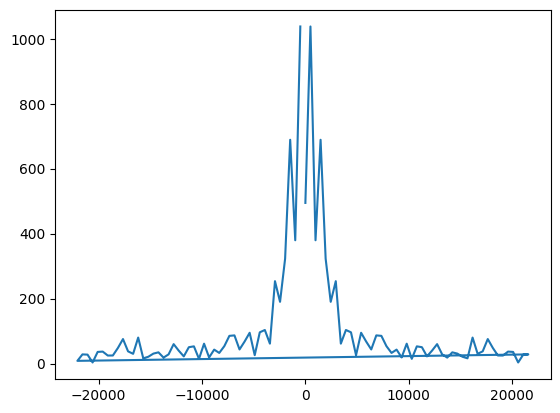

In [75]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = 90

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [66]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)


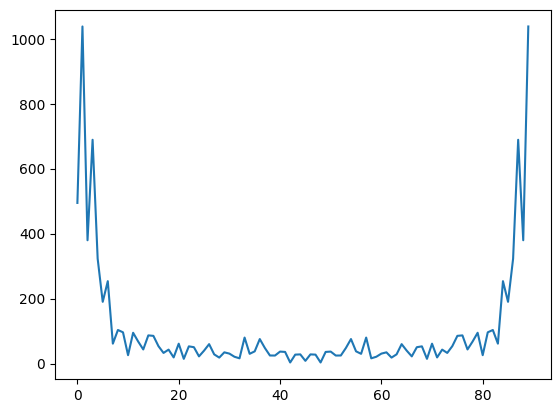

In [62]:
plt.plot(np.abs(yf))
plt.show()

ValueError: x and y must have same first dimension, but have shapes (220500,) and (5,)

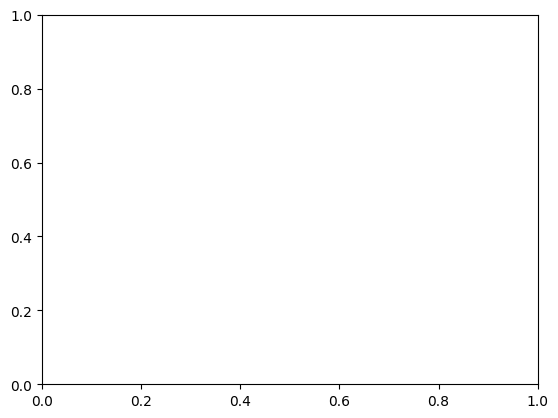

In [17]:
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

In [45]:
fs = 1000.0 # 1 kHz sampling frequency
F1 = 10 # First signal component at 10 Hz
F2 = 60 # Second signal component at 60 Hz
T = 10 # 10s signal length
N0 = -10 # Noise level (dB)

In [51]:
import numpy as np

t = np.r_[0:T:(1/fs)] # Sample times

# Two Sine signal components at frequencies F1 and F2.
signal = np.sin(2 * F1 * np.pi * t) + np.sin(2 * F2 * np.pi * t) 

# White noise with power N0
signal += np.random.randn(len(signal)) * 10**(N0/20.0) 

In [52]:
signal

array([-0.30092442,  0.76492606,  0.90996209, ..., -1.21169048,
       -0.76168886, -0.02562809])

In [53]:
import scipy.signal

# f contains the frequency components
# S is the PSD
(f, S) = scipy.signal.periodogram(signal, fs, scaling='density')

In [54]:
f

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 4.998e+02, 4.999e+02,
       5.000e+02])

In [55]:
S

array([7.00540038e-33, 1.04957005e-04, 3.86593696e-04, ...,
       3.12717140e-04, 4.92916288e-04, 6.23495894e-05])

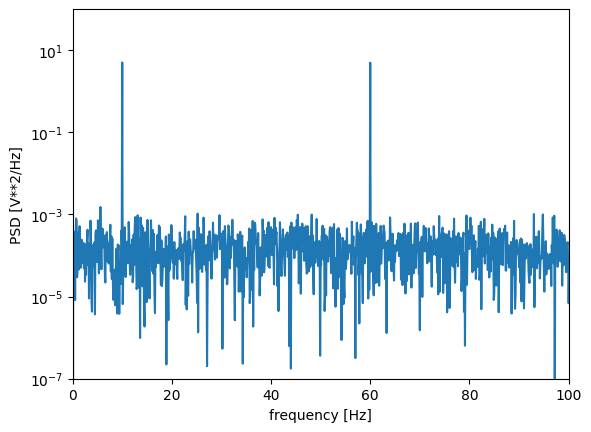

In [56]:
import matplotlib.pyplot as plt

plt.semilogy(f, S)
plt.ylim([1e-7, 1e2])
plt.xlim([0,100])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()